In [4]:
import librosa

x, sampling_rate = librosa.load('./res/win_xp_shutdown.wav')

T = x.size / sampling_rate

import matplotlib.pyplot as plt
import numpy as np

def set_default(figsize=(10, 10), dpi=100):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)
    
set_default(figsize=(16, 8))

dt = 1 / sampling_rate
t = np.r_[0:T:dt]

from IPython.display import display, Audio

Audio(x, rate=sampling_rate)

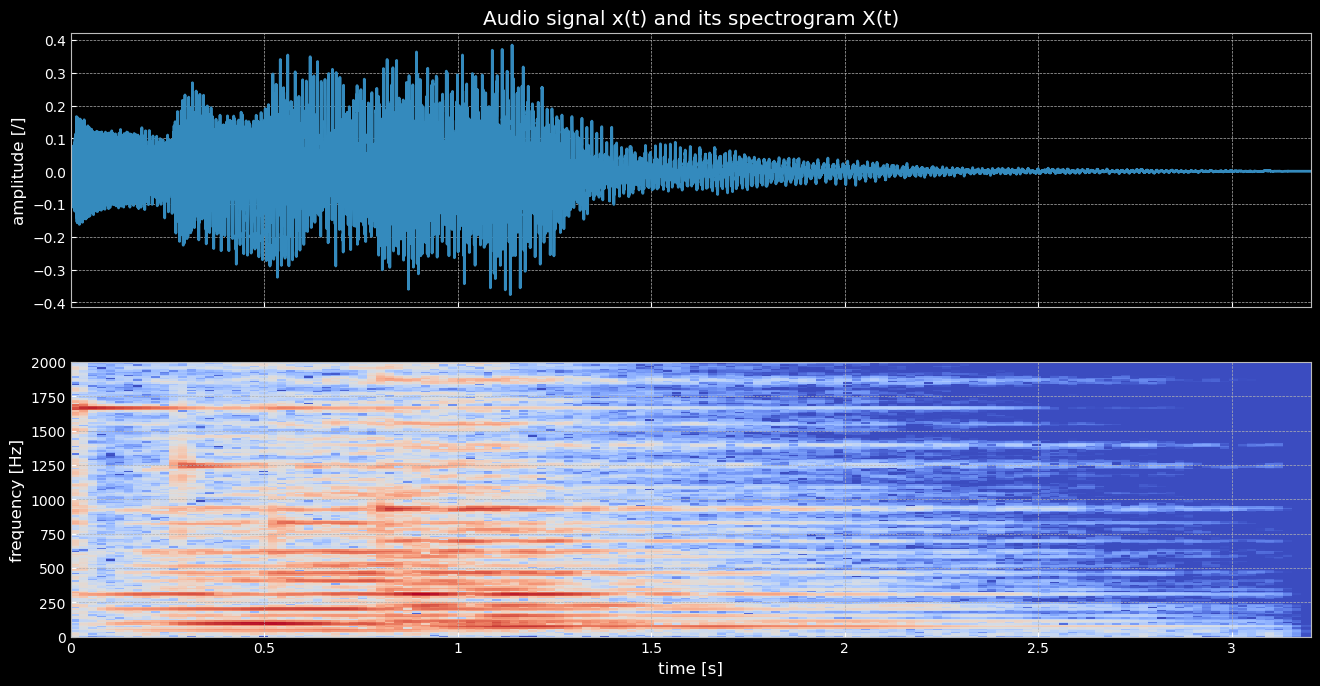

In [5]:
X = librosa.stft(x)
X_dB = librosa.amplitude_to_db(np.abs(X))

from librosa.display import specshow

plt.figure()
plt.subplot(2,1,1)
plt.plot(t, x)
plt.xlim([0, T])
plt.ylabel('amplitude [/]')
plt.title('Audio signal x(t) and its spectrogram X(t)')
plt.setp(plt.gca().get_xticklabels(), visible=False)
plt.subplot(2,1,2)
specshow(X_dB, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.xlabel('time [s]')
plt.ylabel('frequency [Hz]')
plt.ylim(top=2000)
plt.grid(True)

In [11]:
Ab6 = 1661  # Hz
Eb6 = 1244  # Hz
Ab5 = 830   # Hz
Bb5 = 932   # Hz
TT = .4  # s
tt = np.r_[0:TT:dt]

# generate tones
A = {
    'a^(1)': np.sin(2 * np.pi * Ab6 * tt),
    'a^(2)': np.sin(2 * np.pi * Eb6 * tt),
    'a^(3)': np.sin(2 * np.pi * Ab5 * tt),
    'a^(4)': np.sin(2 * np.pi * Bb5 * tt),
}

convs = list()
n = 1
for a in A.items():
    n += 1
    convs.append(np.convolve(x, a[1], mode='same'))


In [12]:
for c in convs:
    display(Audio(c, rate=sampling_rate))